In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [214]:
with open("poland-bankruptcy-data-2009.json","r") as read_file:
    poland_data = json.load(read_file)
    
# print(type(taiwan_data))

print(type(poland_data))

<class 'dict'>


In [215]:
poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

In [216]:
poland_data['metadata']

{'title': 'Ensemble Boosted Trees with Synthetic Features Generation in Application to Bankruptcy Prediction',
 'authors': 'Zieba, M., Tomczak, S. K., & Tomczak, J. M.',
 'journal': 'Expert Systems with Applications',
 'publicationYear': 2016,
 'dataYear': 2009,
 'articleLink': 'doi:10.1016/j.eswa.2016.04.001',
 'datasetLink': 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'}

In [217]:
poland_data['schema']

{'fields': [{'name': 'company_id', 'type': 'integer'},
  {'name': 'feat_1', 'type': 'number'},
  {'name': 'feat_2', 'type': 'number'},
  {'name': 'feat_3', 'type': 'number'},
  {'name': 'feat_4', 'type': 'number'},
  {'name': 'feat_5', 'type': 'number'},
  {'name': 'feat_6', 'type': 'number'},
  {'name': 'feat_7', 'type': 'number'},
  {'name': 'feat_8', 'type': 'number'},
  {'name': 'feat_9', 'type': 'number'},
  {'name': 'feat_10', 'type': 'number'},
  {'name': 'feat_11', 'type': 'number'},
  {'name': 'feat_12', 'type': 'number'},
  {'name': 'feat_13', 'type': 'number'},
  {'name': 'feat_14', 'type': 'number'},
  {'name': 'feat_15', 'type': 'number'},
  {'name': 'feat_16', 'type': 'number'},
  {'name': 'feat_17', 'type': 'number'},
  {'name': 'feat_18', 'type': 'number'},
  {'name': 'feat_19', 'type': 'number'},
  {'name': 'feat_20', 'type': 'number'},
  {'name': 'feat_21', 'type': 'number'},
  {'name': 'feat_22', 'type': 'number'},
  {'name': 'feat_23', 'type': 'number'},
  {'name': 

In [218]:
poland_data['data'][1]

{'company_id': 2,
 'feat_1': 0.14624,
 'feat_2': 0.46038,
 'feat_3': 0.2823,
 'feat_4': 1.6294,
 'feat_5': 2.5952,
 'feat_6': 0.0,
 'feat_7': 0.17185,
 'feat_8': 1.1721,
 'feat_9': 1.6018,
 'feat_10': 0.53962,
 'feat_11': 0.17579,
 'feat_12': 0.38317,
 'feat_13': 0.12647,
 'feat_14': 0.17185,
 'feat_15': 829.46,
 'feat_16': 0.44004,
 'feat_17': 2.1721,
 'feat_18': 0.17185,
 'feat_19': 0.10728,
 'feat_20': 60.954,
 'feat_21': 5.0889,
 'feat_22': 0.17571,
 'feat_23': 0.091295,
 'feat_24': None,
 'feat_25': 0.17523,
 'feat_26': 0.38442,
 'feat_27': 44.593,
 'feat_28': 1.0486,
 'feat_29': 4.0792,
 'feat_30': 0.24384,
 'feat_31': 0.10974,
 'feat_32': 105.09,
 'feat_33': 3.4733,
 'feat_34': 3.3836,
 'feat_35': 0.044076,
 'feat_36': 1.6018,
 'feat_37': None,
 'feat_38': 0.53962,
 'feat_39': 0.027516,
 'feat_40': 0.16406,
 'feat_41': 0.074333,
 'feat_42': 0.10969,
 'feat_43': 149.75,
 'feat_44': 88.801,
 'feat_45': 0.54669,
 'feat_46': 1.033,
 'feat_47': 62.678,
 'feat_48': 0.14497,
 'feat_49'

#### This dataset includes all the information we need to figure whether or not a Polish company went bankrupt in 2009. There's a bunch of features included in the dataset, each of which corresponds to some element of a company's balance sheet. You can explore the features by looking at the data dictionary. Most importantly, we also know whether or not the company went bankrupt. That's the last key-value pair.

In [219]:
len(poland_data['data'])

9977

In [220]:
len(poland_data['data'][0])

66

In [221]:
for item in poland_data['data']:
    if len(item) !=66:
        print("alert")

In [222]:
#### in poland data dict has comprct data 

In [223]:
def wrangle(filename):
    
    # Open compressed file, load into dictionary
    with open("poland-bankruptcy-data-2009.json","r") as read_file:
        poland_data_gz= json.load(read_file)
    

    # Load dictionary into DataFrame, set index
    df = pd.DataFrame().from_dict(poland_data_gz['data']).set_index('company_id')
    return df

In [224]:
df = wrangle('poland-bankruptcy-data-2009.json')
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.29510,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.17571,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.04061,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.23493,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.549,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,0.207660,0.341880,0.271630,0.182060,412.30,0.88528,1.7981,0.182060,0.100450,43.168,1.27240,0.00000,0.100450,NaN,0.41600,0.88528,0.00000,2.21180,3.8104,0.299260,0.228770,241.410,1.5120,1.44780,0.029538,1.8126,49.017,0.45691,0.016296,0.185600,0.059746,0.000000,152.160,108.990,0.849300,1.20190,97.177,-0.310280,-0.171190,1.5364,0.53254,0.66140,3.0496,3.1393,2080.6,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [225]:
print(df.shape)
print(df.info())
df.describe()

(9977, 65)
<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
count,9977.000000,9977.000000,9977.000000,9960.000000,9.952000e+03,9977.000000,9977.000000,9964.000000,9974.000000,9977.000000,9977.000000,9960.000000,9935.000000,9977.000000,9.970000e+03,9964.000000,9964.000000,9977.000000,9935.000000,9935.000000,9205.000000,9977.000000,9935.000000,9764.000000,9977.000000,9964.000000,9.312000e+03,9765.000000,9977.000000,9935.000000,9935.000000,9.881000e+03,9960.000000,9964.000000,9977.000000,9977.000000,5499.000000,9977.000000,9935.000000,9960.000000,9787.000000,9935.000000,9935.000000,9935.000000,9416.000000,9960.000000,9.896000e+03,9977.000000,9935.000000,9964.000000,9977.000000,9896.000000,9765.000000,9765.000000,9.977000e+03,9935.000000,9977.000000,9948.000000,9977.000000,9.415000e+03,9961.00000,9.935000e+03,9960.000000,9765.000000
mean,0.052688,0.623634,0.088614,10.067323,-1.412557e+03,-0.124340,0.065407,16.757657,1.820532,0.362319,0.086838,2.487755,0.398468,0.065418,3.143986e+03,2.805254,18.140668,0.070792,-0.174992,69.208506,4.840924,0.075190,-0.184066,0.211217,0.191608,2.651711,1.206467e+03,6.193016,3.925487,0.511565,-0.182056,1.222782e+03,8.363501,5.350553,0.070245,1.977632,104.333070,0.462751,-0.079554,2.238467,30.017525,-0.154907,198.546636,129.337618,18.320262,9.100358,5.665579e+02,0.004766,-0.232301,8.758203,0.501463,11.814480,5.796618,6.812411,6.771696e+03,-0.561651,-0.028476,3.976806,1.486227,5.938426e+02,13.62412,1.364510e+02,9.034435,36.291450
std,0.662816,6.590734,6.584543,537.128699,1.216712e+05,7.145680,0.666113,673.845491,7.771473,6.592272,0.670537,114.289051,50.953567,0.666112,1.112794e+05,113.029885,678.369961,0.855521,11.421857,1111.739196,313.939449,0.592359,11.391878,2.145307,6.913303,111.582950,3.547726e+04,97.007357,0.838846,73.456483,11.366932,7.019255e+04,38.288488,70.632863,0.582406,2.673262,2527.915962,6.589064,8.287164,37.175019,2918.986451,11.061868,3389.027970,2838.315076,1765.014504,537.056476,3.207637e+04,0.639233,12.215836,535.933251,6.586545,874.003088,91.870869,95.770105,6.121491e+04,57.438557,19.134737,195.155108,79.262784,3.812344e+04,73.22837,2.666901e+04,31.773572,438.506192
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,-17.692000,-1543.800000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-1.107500,-17.692000,-771.650000,-60.742000,-500.750000,-204.300000,-1.901300e+05,-690.400000,-0.358530,-6351.700000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,-0.000084,-2.200900,-479.730000,-551.110000,-7.081900,-667.730000,-765.800000,-25113.000000,-25113.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002080,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.59030,-2.336500e+06,-0.000156,-0.000102
25%,0.000700,0.255280,0.016341,1.036150,-5.266650e+01,0.000000,0.002265,0.430778,1.011100,0.296990,0.009984,0.006402,0.020854,0.002269,1.878050e+02,0.060577,1.447225,0.002269,0.001698,14.524500,0.796750,0.000000,0.000606,0.014302,0.135500,0.055343,0.000000e+00,0.025366,3.397500,0.075462,0.004100,4.497800e+01,2.775800,0.361532,0.001860,1.040000,1.016500,0.426610,0.001676,0.053429,0.022364,0.000000,65.740000,34.232500,0.006488,0.596823,1.514250e+01,-0.048510,-0.036126,0.743122,0.177310,0.123105,0.661440,0.947460,1.304300e+01,0.005136,0.007051,0.875850,0.000000,5.532000e+00,4.49120,4.101200e+01,3.049300,2.003100
50%,0.042731,0.465920,0.197570,1.600650,1.4

In [226]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",None)

<Axes: xlabel='bankrupt'>

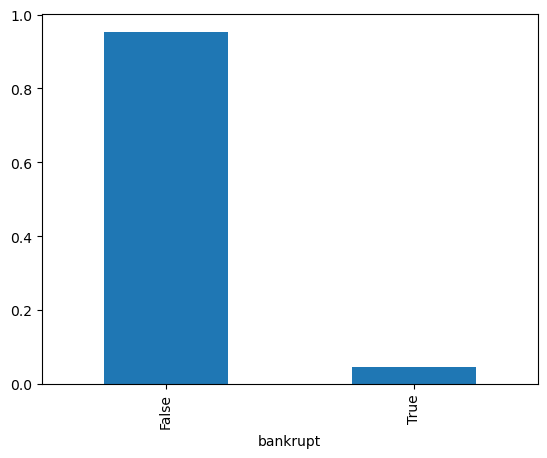

In [227]:
df['bankrupt'].value_counts(normalize=True).plot(kind="bar")

#### is this data seen like tolally one side the retio is 90% to 10% 

In [228]:
df.isna().sum()

feat_1         0
feat_2         0
feat_3         0
feat_4        17
feat_5        25
feat_6         0
feat_7         0
feat_8        13
feat_9         3
feat_10        0
feat_11        0
feat_12       17
feat_13       42
feat_14        0
feat_15        7
feat_16       13
feat_17       13
feat_18        0
feat_19       42
feat_20       42
feat_21      772
feat_22        0
feat_23       42
feat_24      213
feat_25        0
feat_26       13
feat_27      665
feat_28      212
feat_29        0
feat_30       42
feat_31       42
feat_32       96
feat_33       17
feat_34       13
feat_35        0
feat_36        0
feat_37     4478
feat_38        0
feat_39       42
feat_40       17
feat_41      190
feat_42       42
feat_43       42
feat_44       42
feat_45      561
feat_46       17
feat_47       81
feat_48        0
feat_49       42
feat_50       13
feat_51        0
feat_52       81
feat_53      212
feat_54      212
feat_55        0
feat_56       42
feat_57        0
feat_58       29
feat_59       

#### here same nall value so it replace with median and target columns has no nall and one thing feat_37 is 4478 nall value so is to much that way i remove thr inter columns

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


In [230]:
df=df.drop(columns='feat_37')
df.shape

(9977, 64)

In [231]:
df = df.fillna(df.median(numeric_only=True))


#### replacing all nall value with median

In [232]:
df.shape

(9977, 64)

In [233]:
X=df.drop(columns="bankrupt")
X.shape

(9977, 63)

In [234]:
y=df.bankrupt


<Axes: >

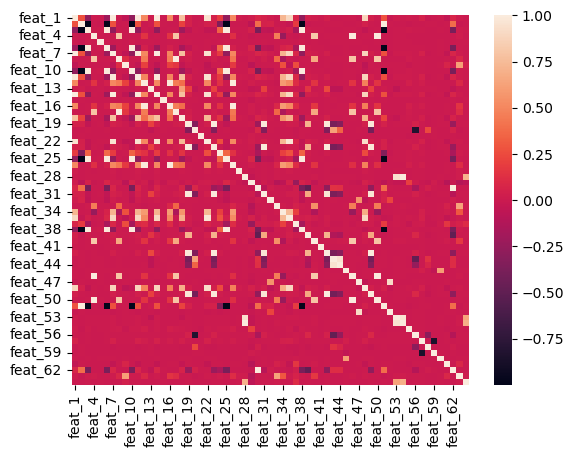

In [235]:
corr=X.corr
sns.heatmap(corr())


## here is not possible to find corr() in this plot so i am using the PCA methode

## Principal Component Analysis: 
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

Let's take the following example where the data is distributed like the diagram on the left:
<img src="PCA_intro1.PNG" width="500">



In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [237]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


## Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. (This will be different than the resampling we did with time series data in Project 3.) There are many to do this, so let's start with under-sampling.

In [238]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(768, 63)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
company_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1509,0.121400,0.097238,0.74500,8.66160,25.8370,0.000000,0.158840,9.284100,2.7588,0.902760,0.207770,1.633500,0.064857,0.158840,198.36,1.84010,10.2840,0.158840,0.057575,74.416,0.95563,0.20776,0.044003,0.158840,0.293860,1.45510,4.24640,4.72220,3.0175,0.022400,0.057575,13.923,26.2160,26.21600,0.20967,2.7588,0.902760,0.075999,0.375010,0.014225,0.075308,106.610,32.190,0.21583,2.87720,80.537,0.187670,0.068026,8.66160,0.097238,0.038145,5.722200,5.722200,775.71,0.075999,0.13447,0.94243,0.000000,4.9049,11.3390,12.865,28.3720,17.4870
6096,0.316280,0.264920,0.65346,3.46660,55.1890,0.290140,0.316280,2.774700,2.4721,0.735080,0.336950,1.193800,0.138170,0.316280,283.09,1.28940,3.7747,0.316280,0.127940,34.426,0.79841,0.32373,0.127940,1.465700,0.606420,1.28940,15.66400,8.00600,3.3208,0.086283,0.127940,44.449,8.2117,8.21170,0.29663,2.4721,0.735080,0.119990,0.537080,0.025301,0.130950,114.590,80.162,1.35650,2.58650,39.121,0.298430,0.120720,3.46660,0.264920,0.121780,9.006000,9.006000,1367.90,0.119990,0.43027,0.87412,0.000000,10.6020,4.5533,39.115,9.3314,30.2870
7369,0.066615,0.890270,-0.48007,0.46076,-76.3080,0.047487,0.087936,-0.011406,1.0952,-0.010155,0.087936,0.098775,0.057904,0.087936,1817.20,0.20086,1.1233,0.087936,0.028474,11.396,1.18460,0.27149,0.021570,0.080794,-0.010155,0.17691,0.96274,-0.81395,4.9868,0.286830,0.028474,115.230,3.1675,0.30495,0.27149,3.1503,-0.010155,0.087908,0.007229,0.080771,0.087908,47.721,36.325,0.69086,0.35246,12.481,0.180600,0.058479,0.46076,0.890270,0.315710,-0.017217,-0.017217,-46566.00,0.086894,-6.56010,0.91311,0.000000,32.0280,10.0480,105.220,3.4689,5.2362
5268,0.208000,0.363630,0.33875,1.93160,-5.3169,0.251870,0.258280,1.603300,1.0535,0.583020,0.258280,0.710280,0.057751,0.258280,424.21,0.86043,2.7500,0.258280,0.047673,10.463,2.02660,0.26389,0.038392,0.317160,0.583020,0.72215,0.51313,1.13820,5.7421,0.066496,0.047673,25.808,14.1430,0.72571,0.26389,5.4410,0.583020,0.048709,0.720420,0.037537,0.048709,29.671,19.208,1.33930,1.50450,11.023,0.209290,0.038631,1.93160,0.363630,0.070707,1.959000,1.959000,187050.00,0.050746,0.35676,0.94925,0.000000,34.8840,19.0030,24.498,14.8990,18.2040
395,0.096863,0.299320,0.35393,2.42640,31.5630,0.267550,0.125130,2.341000,1.0495,0.700680,0.125130,0.504290,0.094971,0.125130,503.83,0.72444,3.3410,0.125130,0.054806,26.485,0.75637,0.13551,0.042425,0.339150,0.700680,0.63000,0.62285,0.88942,3.9272,0.088120,0.054806,41.630,8.7677,0.45272,0.13551,2.3127,0.751860,0.059350,0.417810,0.043310,0.059350,79.675,53.191,0.58468,1.75870,27.794,0.043802,0.019185,2.01150,0.248140,0.114050,1.760800,1.889400,2993.00,0.047123,0.13824,0.95288,0.073041,13.7820,6.8621,39.668,9.2013,5.7376


In [239]:
y_train_under.value_counts(normalize=True)

bankrupt
False    0.5
True     0.5
Name: proportion, dtype: float64

In [240]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(15194, 63)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.279320,0.053105,0.852030,17.0440,199.080,0.741770,0.353570,16.00600,1.2346,0.84997,0.353570,6.658000,0.224060,0.353570,49.103,7.433300,18.8310,0.353570,0.200690,0.000,0.97970,0.334720,0.158550,0.944070,0.84997,6.035200,2.34570,8.98170,4.7926,-0.19608,0.200690,13.584,26.8710,6.3030,0.334720,1.7814,0.84997,0.189990,9.118600,0.004645,0.189990,87.200,87.2000,0.258545,17.04400,0.000,0.293550,0.166620,17.04400,0.053105,0.037215,8.96000,8.9600,52857.00,0.190040,0.328630,0.80996,0.00000,9.9337,4.1858,11.002,33.1760,18.5720
1,0.001871,0.735120,0.156460,1.2269,-10.837,0.000000,0.002938,0.36032,1.4809,0.26488,0.028130,0.004261,0.020976,0.002938,8637.700,0.042257,1.3603,0.002938,0.001984,49.147,0.95563,0.027265,0.001263,0.002938,0.16425,0.040805,1.08230,1.01620,3.4491,0.49604,0.013989,172.510,2.1158,1.9847,0.021908,1.4809,0.26488,0.014794,0.000974,0.442390,0.018411,208.360,159.2100,0.009383,0.93773,49.885,-0.000861,-0.000581,1.15090,0.689580,0.472640,1.72040,1.7204,440.02,0.014794,0.007064,0.99803,0.00000,7.4268,2.2925,169.960,2.1476,9.6185
2,0.113940,0.490250,0.077121,1.2332,-43.184,-0.000171,0.113940,1.03980,1.1649,0.50975,0.114370,0.344490,0.102320,0.113940,1501.300,0.243120,2.0398,0.113940,0.097812,58.129,0.96394,0.000000,0.097812,0.198640,0.48469,0.243120,0.00000,0.13024,4.7772,0.39284,0.218560,132.000,2.7652,1.8655,0.003020,1.1649,0.64948,0.002593,0.100710,3.113200,0.000000,117.360,59.2320,0.614170,0.67226,74.039,-0.005249,-0.004506,0.83195,0.330750,0.361640,0.86087,1.0968,4617.40,0.214890,0.223520,0.78761,0.27412,6.2791,6.1622,103.630,3.5220,1.9673
3,0.008136,0.652610,0.148120,1.2628,29.071,0.000000,0.008136,0.53230,1.2891,0.34739,0.180610,0.014436,0.126360,0.008136,1462.400,0.249590,1.5323,0.008136,0.006311,16.045,0.88067,0.170880,0.006311,0.289330,0.14696,0.249590,0.99074,0.51383,3.7936,0.44269,0.024816,167.130,2.1839,1.8861,0.058227,1.2891,0.39742,0.045169,0.153470,0.066806,0.132560,177.030,160.9900,0.143570,1.16230,16.804,0.016127,0.012510,1.09060,0.563600,0.457890,1.20510,1.3786,920.98,0.045169,0.023421,0.99434,0.14403,22.7480,2.2673,159.580,2.2872,4.4718
4,0.045396,0.279640,0.708730,3.7656,238.120,0.000000,0.056710,2.57610,1.0169,0.72036,0.086239,0.221300,0.064664,0.056710,1552.200,0.235140,3.5761,0.056710,0.055769,26.285,0.59057,0.049480,0.044643,0.746720,0.71706,0.194680,1.67560,20.24400,4.1807,-0.58078,0.084195,96.571,3.7796,3.4637,0.048303,1.0169,0.72036,0.047501,3.399000,0.159270,0.048659,33.724,7.4389,0.619920,3.47990,27.596,0.040436,0.039765,3.45090,0.256260,0.264580,20.57600,20.5760,10744.00,0.047501,0.063019,0.94624,0.00000,13.8860,49.0660,91.984,3.9681,29.0460


In [241]:
y_train_over.value_counts(normalize=True)

bankrupt
False    0.5
True     0.5
Name: proportion, dtype: float64

## SMOTE

In [242]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape

(15194, 63)

In [243]:
y_resampled.value_counts(normalize=True)

bankrupt
False    0.5
True     0.5
Name: proportion, dtype: float64

# Build Model use decion tree for all tree data

In [244]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# Fit on X_train, y_train
model_reg = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PCA(n_components=0.95),  # keeps 95% of variance
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on X_train_under, y_train_under
model_under = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PCA(n_components=0.95),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on X_train_over, y_train_over
model_over = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PCA(n_components=0.95),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)
# fit X_resampled, y_resampled 
model_smote=make_pipeline(
     SimpleImputer(strategy='median'),
     StandardScaler(),
     PCA(n_components=0.95),
     DecisionTreeClassifier(random_state=42)
    
)
model_smote.fit(X_resampled, y_resampled)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

##### i remove nan value so we not used the SimpleImputer but is better option for doing

In [245]:
for m in [model_reg, model_under, model_over,model_smote]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)


    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9048
Training Accuracy: 0.6256
Test Accuracy: 0.5842
Training Accuracy: 1.0
Test Accuracy: 0.9038
Training Accuracy: 1.0
Test Accuracy: 0.7991


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

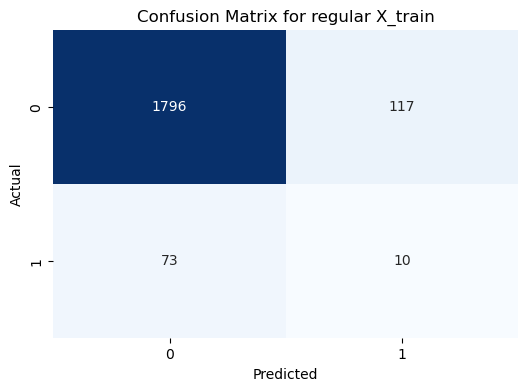

In [246]:
pred_dt=model_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for regular X_train")
plt.show()

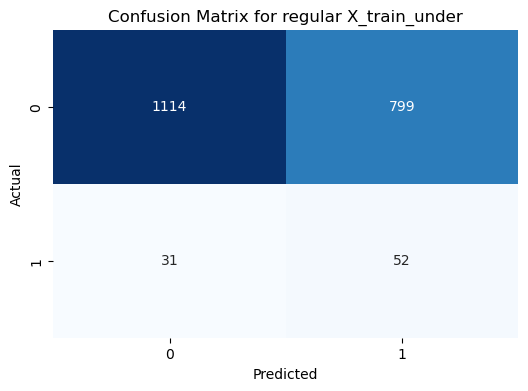

In [247]:
pred_undt=model_under.predict(X_test)
cm1 = confusion_matrix(y_test, pred_undt)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for regular X_train_under")
plt.show()


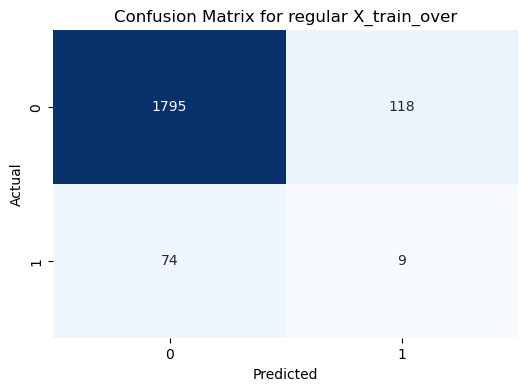

In [248]:
pred_ovdt=model_over.predict(X_test)
cm2 = confusion_matrix(y_test, pred_ovdt)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for regular X_train_over")
plt.show()

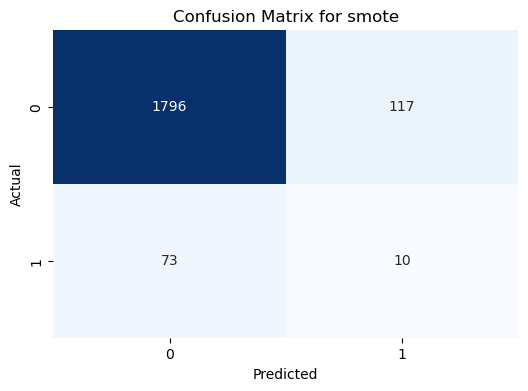

In [249]:
pred_smote=model_smote.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for smote")
plt.show()

#### we are thing model has very good accuracy than is good but here not true becouse we find resutlt on confusion matrix The model performs very well on the majority class (0) but struggles significantly with the minority class (1).Very low recall and precision for class 1: 

# Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline  # Use imblearn's pipeline for SMOTE
from imblearn.over_sampling import SMOTE

# Pipeline without nested list
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])


In [251]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20,30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__bootstrap': [True, False]
}


In [252]:
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [253]:
search.fit(X_train, y_train)

best_model = search.best_estimator_

y_pred = best_model.predict(X_test)


print(classification_report(y_test, y_pred))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1913
        True       0.31      0.29      0.30        83

    accuracy                           0.94      1996
   macro avg       0.64      0.63      0.63      1996
weighted avg       0.94      0.94      0.94      1996



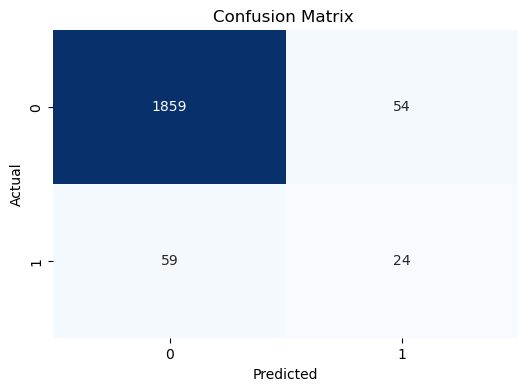

In [254]:
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

### After long time to train the model of Random Forest Classifier we get same better result not to gerat but ok and better from decion tree 

In [255]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [256]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.3).astype(int)  # Try 0.25, 0.3, etc.


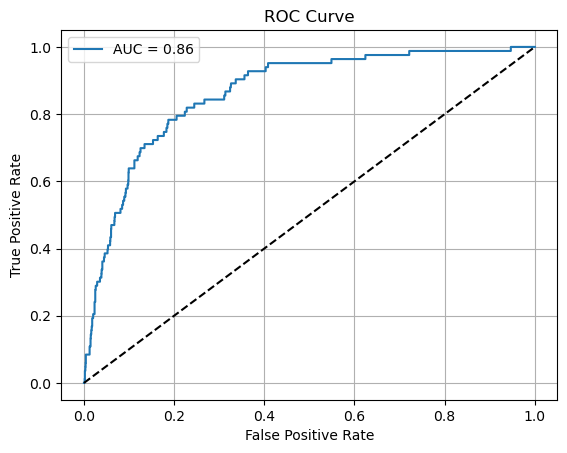

In [257]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


#### The top point on the ROC curve represents the model's best performance — it has a True Positive Rate (TPR) close to 1 and a False Positive Rate (FPR) close to 0. This means the model correctly identifies nearly all positive cases with very few false alarms.

#### What This Means for Your Model (AUC = 0.86)
The curve approaches this top-left point quite well.

An AUC (Area Under Curve) of 0.86 shows the model has excellent discriminatory ability.

AUC of 0.5: No better than random guessing.

AUC of 1.0: Perfect classifier.

The closer the curve hugs the top-left corner, the better the model performs across all classification thresholds.



### The model still struggles to identify class 1 (the minority):

 